**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
s = json.load(open("fbb_matplotlibrc.json"))
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  mplDeprecation)


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors_func=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    #np.random.randn(123)
    if errors_func is None:
        return a*x + b 
    else:
        return (a*x + b + np.random.randn(len(x)) * errors(x))
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0,0.5,'exogenous')

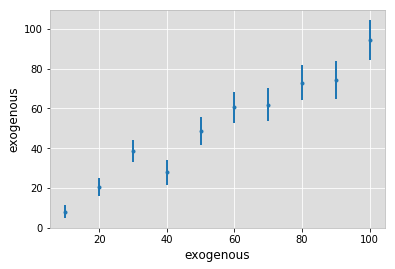

In [3]:
np.random.seed(2018)
x = np.linspace(10, 100, 10)
dy = errors(x) 
y = line(0.9, x, errors_func=1)
pl.errorbar(x, y, yerr=dy, fmt='.')
pl.xlabel('exogenous')
pl.ylabel('exogenous')

# Figure 1

Here is the uncertainties errorbar plot of the line with 0.9 slope and intercept = 0.

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [4]:
print('x:', x)
print('y:', y)

x: [  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]
y: [  8.12478401  20.60211679  38.76726739  27.90781366  48.55163394
  60.63077441  61.80533252  72.98457352  74.47244424  94.33564082]


In [5]:
new_x = sm.add_constant(x)

In [6]:
print(new_x)

[[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [7]:
#THE WRONG WAY
smfit = sm.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     886.4
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           2.66e-10
Time:                        16:00:57   Log-Likelihood:                -31.606
No. Observations:                  10   AIC:                             65.21
Df Residuals:                       9   BIC:                             65.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9127      0.031     29.772      0.000         0.843     0.982
==============================================================================
Omnibus:                        0.101   Durbin-Watson:                   2.686
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.090
Skew:                           0.026   Prob(JB):                        0.956
Kurtosis:                       2.537   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#THE RIGHT WAY
smfit_OLS = sm.OLS(y, new_x).fit()
smfit_OLS.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     162.9
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.34e-06
Time:                        16:00:57   Log-Likelihood:                -31.323
No. Observations:                  10   AIC:                             66.65
Df Residuals:                       8   BIC:                             67.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.8900      4.237      0.682      0.514        -6.881    12.661
x1             0.8714      0.068     12.761      0.000         0.714     1.029
==============================================================================
Omnibus:                        0.025   Durbin-Watson:                   2.858
Prob(Omnibus):                  0.988   Jarque-Bera (JB):                0.206
Skew:                          -0.088   Prob(JB):                        0.902
Kurtosis:                       2.319   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Differences

The add_constant function add the constant term to x, so the formula will be y=kx+b. And constant makes sure all residuals have mean of zero.

# 4. plot the data (as points) and both statsmodels fits

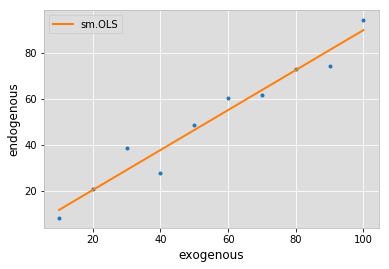

In [9]:
pl.plot(x, y, '.')
pl.plot(x, smfit_OLS.fittedvalues, '-', label="sm.OLS")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend()

# Figure 2

Here is the plot of the original data point and the fit line.

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0,0.5,'exogenous')

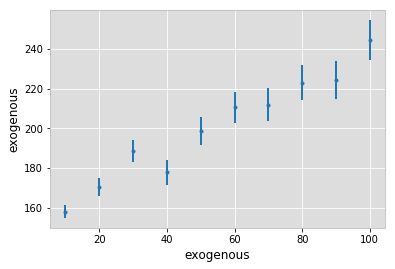

In [10]:
np.random.seed(2018)
x = np.linspace(10, 100, 10)
dy = errors(x) 
y = line(0.9, x, b=150, errors_func=1)
pl.errorbar(x, y, yerr=dy, fmt='.')
pl.xlabel('exogenous')
pl.ylabel('exogenous')

# Figure 3

Here is the uncertainties errorbar plot of the line with 0.9 slope and intercept = 150.

# 6. repeat step 3

In [11]:
#THE RIGHT WAY
new_x = sm.add_constant(x)
smfit_OLS2 = sm.OLS(y, new_x).fit()
smfit_OLS2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     162.9
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.34e-06
Time:                        16:00:57   Log-Likelihood:                -31.323
No. Observations:                  10   AIC:                             66.65
Df Residuals:                       8   BIC:                             67.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        152.8900      4.237     36.084      0.000       143.119   162.661
x1             0.8714      0.068     12.761      0.000         0.714     1.029
==============================================================================
Omnibus:                        0.025   Durbin-Watson:                   2.858
Prob(Omnibus):                  0.988   Jarque-Bera (JB):                0.206
Skew:                          -0.088   Prob(JB):                        0.902
Kurtosis:                       2.319   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [12]:
wls_model = sm.WLS(y, new_x, weights=1/sqrt(x)).fit()

In [13]:
wls_model.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            WLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     173.5
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.05e-06
Time:                        16:00:57   Log-Likelihood:                -31.563
No. Observations:                  10   AIC:                             67.13
Df Residuals:                       8   BIC:                             67.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        152.1397      3.576     42.540      0.000       143.892   160.387
x1             0.8838      0.067     13.173      0.000         0.729     1.038
==============================================================================
Omnibus:                        0.289   Durbin-Watson:                   2.811
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.080
Skew:                           0.139   Prob(JB):                        0.961
Kurtosis:                       2.662   Cond. No.                         98.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared of WLS is little less than OLS, which shows the WLS model is little better than OLS, but not too much.

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

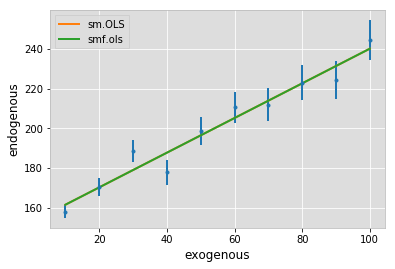

In [14]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfit_OLS2.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();

# Figure 4

Here is the plot of the original data point and the fit lines of sm.OLS and smf.OLS.